<a href="https://colab.research.google.com/github/AlejoGalloM/MachineLearning/blob/master/Taller4_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Taller 4
## *Integrantes*

*   Alejandro Cifuentes Montoya
*   Alejandro Gallo Murillo

En este artículo se presenta la solución del taller 4 en el que se muestra los pasos realizados para el método kmeans que vimos en clase de machine learning y que por medio de esta implementación afianzamos los conceptos aprendidos.

##Librerias importadas para la realización del taller

In [ ]:

import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt


##Punto 1
Función para calcular la distancia euclidiana

In [ ]:
def distance(p1, p2):
    return np.sum((p1 - p2)**2)

##Punto 2


Se importan datos genéricos tomados de [kaggle](https://www.kaggle.com/).
Este bloque de código se ejecuta estando en drive

In [ ]:
data = pd.read_csv("./drive/MyDrive/500_Person_Gender_Height_Weight_Index.csv")
data.shape

(500, 4)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Se importan los datos. Este bloque de código se ejecuta estando en ambiente local teniendo el archivo **'500_Person_Gender_Height_Weight_Index.csv'**

In [ ]:
data = pd.read_csv("./500_Person_Gender_Height_Weight_Index.csv")
data.shape

FileNotFoundError: ignored

Esta función se encarga de retornar centroides de manera aleatoria para poder trabajar el método

In [ ]:
def get_random_centroids(data, k = 3):
    
    #Retorna ejemplos random para el dataset
    cent = (X.sample(n = k))
    return cent

La siguiente función se encarga de iterar sobre cada punto del centroide para calcular la distancia de este con respecto a los otros puntos y los cuarda en una lista llamada ED para luego almacenarlo en un vector de listas. Luego empieza a validar las distancias y las va almacenando en los diferentes cluster de acuerdo al valor de las distancias con respecto a los centroides, los ubica en el cluster del centroide específico.

In [ ]:
def k_means_fit(X,centroids, n = 5):
    X_data = X
    diff = 1
    j=0

    while(diff!=0.0):
        i=1

        #iterate over each centroid point 
        for index1,row_c in centroids.iterrows():
            ED=[]

            #iterate over each data point
            for index2,row_d in X_data.iterrows():

                #calculate distance between current point and centroid
                d1=(row_c["Height"]-row_d["Height"])**2
                d2=(row_c["Weight"]-row_d["Weight"])**2
                d=np.sqrt(d1+d2)

                #append distance in a list 'ED'
                ED.append(d)

            #append distace for a centroid in original data frame
            X[i]=ED
            i=i+1

        C=[]
        for index,row in  X.iterrows():

            #get distance from centroid of current data point
            min_dist=row[1]
            pos=1

            #loop to locate the closest centroid to current point
            for i in range(n):

                #if current distance is greater than that of other centroids
                if row[i+1] < min_dist:

                    #the smaller distanc becomes the minimum distance 
                    min_dist = row[i+1]
                    pos=i+1
            C.append(pos)

        #assigning the closest cluster to each data point
        X["Cluster"]=C
        

        #grouping each cluster by their mean value to create new centroids
        centroids_new = X.groupby(["Cluster"]).mean()[["Weight","Height"]]
        if j == 0:
            diff=1
            j=j+1

        else:
            #check if there is a difference between old and new centroids
            diff = (centroids_new['Weight'] - centroids['Weight']).sum() + (centroids_new['Height'] - centroids['Height']).sum()
            print(diff.sum())
            

        centroids = X.groupby(["Cluster"]).mean()[["Weight","Height"]]
        
    return X, centroids

En el siguiente fragmento de código se implementa el método de K-means y se grafica la distribución de puntos de acuerdo a los datos obtenidos.

11.815896705525667
7.371506846962916
6.452335372514952
3.92232035582294
4.339185162914305
4.433683520085928
2.1244568561076633
3.0161782554549106
-0.938431900860607
0.7594520055910436
2.1576237243188814
0.08124415531446516
-1.3563299840461411
-1.4111630912382367
0.8523145493661843
1.5123159513182571
1.6365332838451536
1.2404431973085508
0.3969354305230013
0.7929007279947768
0.6299540606144376
0.5716495468111162
0.5603343464357806
0.13185324014051503
0.0


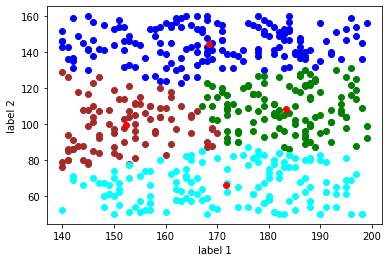

In [ ]:
X = data
centroids = get_random_centroids(X, k = 4)
clustered, cent = k_means_fit(X,centroids, n= 4)
plot()

Se muestran los puntos que se obtuvieron de cada closter y los datos y cada una de sus clasificaciones por columna

In [ ]:
print(clustered)
print(cent)

     Gender  Height  Weight  Index  ...          2          3          4  Cluster
0      Male     174      96      4  ...  21.896322  15.624823  29.764123        3
1      Male     189      87      2  ...  38.671035  22.252625  26.969638        3
2    Female     185     110      4  ...  34.313473   2.218717  45.659522        3
3    Female     195     104      3  ...  42.880623  12.501421  44.306856        3
4      Male     149      61      3  ...  38.538242  58.633953  23.297597        4
..      ...     ...     ...    ...  ...        ...        ...        ...      ...
495  Female     150     153      5  ...  53.661461  55.589382  89.344062        1
496  Female     184     121      4  ...  38.308646  12.495049  56.044379        3
497  Female     141     136      5  ...  38.333542  50.479144  76.129551        1
498    Male     150      95      5  ...   4.988559  35.982575  35.947496        2
499    Male     173     131      5  ...  37.746897  24.744225  64.687069        1

[500 rows x 9 c

Esta función se encarga de graficar los puntos y de acuerdo a estos se encarga de dividirlos en diferentes colores

In [ ]:
def plot():
  #setting color values for our 
  color=['brown','blue','green','cyan']

  #plot data
  for k in range(len(color)):
      cluster=clustered[clustered["Cluster"]==k+1]
      plt.scatter(cluster["Height"],cluster["Weight"],c=color[k])

  #plot centroids    
  plt.scatter(cent["Height"],cent["Weight"],c='red')
  plt.xlabel('label 1')
  plt.ylabel('label 2')

Esta es la implementación para el método de K-means++ el cual se encarga de realizar el proceso de manera más óptima.

In [ ]:
def get_kmeans_pp_centroids(X1,k = 5):
    centroids = X1.sample()
    print(centroids)
    i = 1
    dist = []
    while i != k:
        max_dist = [0,0]
        #go through the centroids
        for index, row in centroids.iterrows():
            #calculate distance of every centroid with every other data point 
            d = np.sqrt((X1["Height"] - row["Height"])**2 +(X1["Weight"] - row["Weight"])**2)
            #check which centroid has a max distance with another point
            if max(d) > max(max_dist):
                max_dist = d

        X1 = pd.concat([X1, max_dist], axis = 1)
        idx = X1.iloc[:,i+1].idxmax()
        max_coor = pd.DataFrame(X1.iloc[idx][["Height", "Weight"]]).T
        centroids = pd.concat([centroids,max_coor])
        X1 = X1.drop(idx)
        i+=1
    return centroids

En el siguiente bloque de código se llama la función que implementa el método de K-means++ y luego grafica la distribución de los puntos

    Gender  Height  Weight  Index  ...          2          3          4  Cluster
16  Female     157     110      5  ...  36.327719  26.386552  46.074972        1

[1 rows x 9 columns]
-5.479312163687183
-1.1930486075617637
0.2229459802915983
-0.40845675436877116
-0.730741926741274
0.5330873729077013
0.8418679431278235
0.0


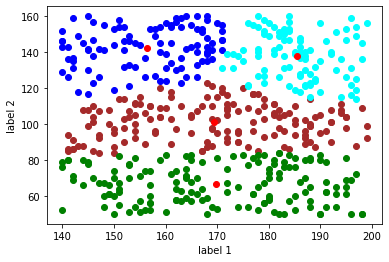

In [ ]:
X = data
centroids = get_kmeans_pp_centroids(X, k = 4)
clustered, cent = k_means_fit(X,centroids, n= 4)
plot()

Se muestran los puntos que se obtuvieron de cada closter y los datos y cada una de sus clasificaciones por columna

In [ ]:
print(clustered)
print(cent)

     Gender  Height  Weight  Index  ...          2          3          4  Cluster
0      Male     174      96      4  ...  49.050115  19.603125  18.405167        4
1      Male     189      87      2  ...  61.588069  35.841073  24.603126        4
2    Female     185     110      4  ...  38.923237  33.506455   1.309122        4
3    Female     195     104      3  ...  49.232131  41.314435  12.783696        4
4      Male     149      61      3  ...  85.499486  35.760069  61.414576        1
..      ...     ...     ...    ...  ...        ...        ...        ...      ...
495  Female     150     153      5  ...  19.066758  56.820617  54.167629        2
496  Female     184     121      4  ...  28.997387  38.519897   9.836166        4
497  Female     141     136      5  ...  27.466654  41.853106  50.015317        2
498    Male     150      95      5  ...  52.428464   4.602445  38.028520        3
499    Male     173     131      5  ...  14.790655  39.326613  22.880027        2

[500 rows x 9 c


##Punto 3
Utilizando los datos de test de fashion_mnist aplicar PCA en scikit-learn tomando las dos primeras
componentes principales y realizar un diagrama de dispersión pintando los puntos que pertenecen a una
misma clase del mismo color. Tome los datos de test de fashion_mnist (sin aplicar PCA) aplique el
método de K-Means++ que diseñó (10 grupos) y realice la misma gráfica de dispersión anteriormente
propuesta, pintando los puntos de los colores de las etiquetas que arroja su algoritmo con las tres métricas
de distancia (esto implica que debe mostrar 4 gráficas en total).

Se importa la base de datos para la implementación del ejercicio

In [ ]:
from tensorflow.keras.datasets import fashion_mnist
from random import randint

(X_train, y_train),(X_test, y_test) = fashion_mnist.load_data();

4431872/4422102 [==============================] - 0s 0us/step


Se implementa el método de K-means++ para cada una de las fotos de la base de datos y se imprime su distribución en las graficas.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: overflow encountered in ubyte_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: overflow encountered in ubyte_scalars


-122.12640858533419
-30.236390102799003
-13.988748540623392
0.0
     Weight  Height          1           2           3           4  Cluster
0         0       0   3.398555  109.501689  192.231513  259.255756        1
1         0       1   2.945499  108.504637  192.164246  258.555236        1
2         1       1   2.022636  108.432140  191.166351  257.841587        1
3         2       0   2.092932  109.367112  190.236450  257.834238        1
4         0       0   3.398555  109.501689  192.231513  259.255756        1
..      ...     ...        ...         ...         ...         ...      ...
387      44       2  41.207595  112.950841  148.203214  228.400778        1
388       0       1   2.945499  108.504637  192.164246  258.555236        1
389       0       0   3.398555  109.501689  192.231513  259.255756        1
390       0       0   3.398555  109.501689  192.231513  259.255756        1
391       0       0   3.398555  109.501689  192.231513  259.255756        1

[392 rows x 7 columns]


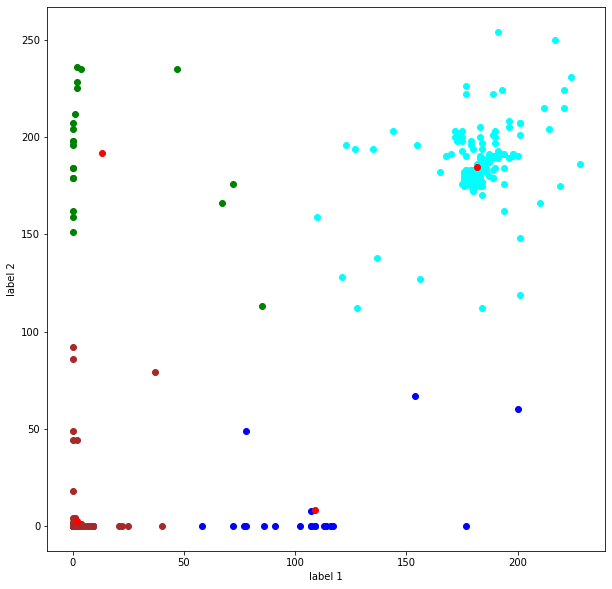

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: overflow encountered in ubyte_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: overflow encountered in ubyte_scalars


4.684663202620742
39.69828247659561
36.739124229572106
32.5542466667942
34.17172217919679
38.96864848643236
14.038779956426978
-0.3524841220386765
0.15937761047801047
-2.773333333333312
0.0
     Weight  Height           1          2           3          4  Cluster
0         0       0  290.357725  221.77801  219.675518   4.143179        4
1         0       0  290.357725  221.77801  219.675518   4.143179        4
2         0       0  290.357725  221.77801  219.675518   4.143179        4
3         0       0  290.357725  221.77801  219.675518   4.143179        4
4         0       0  290.357725  221.77801  219.675518   4.143179        4
..      ...     ...         ...        ...         ...        ...      ...
387      33       0  267.100151  209.79263  188.254703  32.112497        4
388       0       0  290.357725  221.77801  219.675518   4.143179        4
389       0       0  290.357725  221.77801  219.675518   4.143179        4
390       0       0  290.357725  221.77801  219.675518   4.1

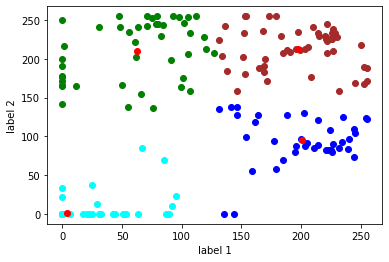

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: overflow encountered in ubyte_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: overflow encountered in ubyte_scalars


65.38149363994276
70.31739631072557
51.085177028337625
44.8296751616064
42.015690921038974
38.24590218342135
29.29578067479521
30.51138238028047
16.029889982016286
2.615199966935958
0.0
     Weight  Height           1           2           3         4  Cluster
0         0       0  282.888427  171.029076  111.226998  2.261878        4
1         0       0  282.888427  171.029076  111.226998  2.261878        4
2         0       0  282.888427  171.029076  111.226998  2.261878        4
3         0       0  282.888427  171.029076  111.226998  2.261878        4
4         0       0  282.888427  171.029076  111.226998  2.261878        4
..      ...     ...         ...         ...         ...       ...      ...
387       0       0  282.888427  171.029076  111.226998  2.261878        4
388       0       0  282.888427  171.029076  111.226998  2.261878        4
389       0       0  282.888427  171.029076  111.226998  2.261878        4
390       0       0  282.888427  171.029076  111.226998  2.26187

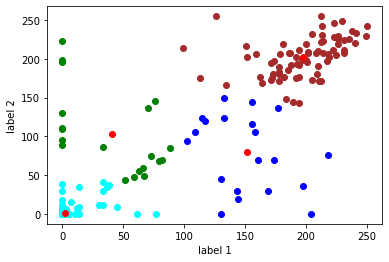

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: overflow encountered in ubyte_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: overflow encountered in ubyte_scalars


72.27182281946
67.11580630104547
87.34055801399744
71.63014275885791
35.95121522540309
27.558576488610615
18.91385192234331
35.30737201551776
27.207904233613867
5.298840974736732
0.0
     Weight  Height           1          2           3         4  Cluster
0         0       0  271.801324  191.32092  113.903349  2.470572        4
1         0       0  271.801324  191.32092  113.903349  2.470572        4
2         0       0  271.801324  191.32092  113.903349  2.470572        4
3         0       0  271.801324  191.32092  113.903349  2.470572        4
4         0       0  271.801324  191.32092  113.903349  2.470572        4
..      ...     ...         ...        ...         ...       ...      ...
387       0       0  271.801324  191.32092  113.903349  2.470572        4
388       0       0  271.801324  191.32092  113.903349  2.470572        4
389       0       0  271.801324  191.32092  113.903349  2.470572        4
390       0       0  271.801324  191.32092  113.903349  2.470572        4
391

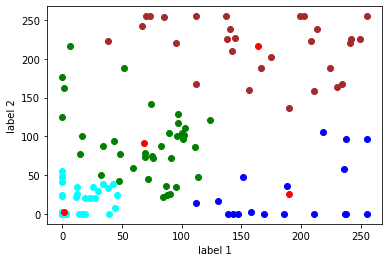

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: overflow encountered in ubyte_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: overflow encountered in ubyte_scalars


60.488387228439365
65.0262853339094
41.61095633131973
11.634932518471189
15.186677152339911
18.539722658474673
2.12791419168137
0.0
     Weight  Height           1           2           3           4  Cluster
0         0       0  194.996241  177.484926    4.113359  263.211620        3
1         0       0  194.996241  177.484926    4.113359  263.211620        3
2         0       0  194.996241  177.484926    4.113359  263.211620        3
3         0       0  194.996241  177.484926    4.113359  263.211620        3
4        92     162   32.158396  121.233975  182.485726   98.084721        1
..      ...     ...         ...         ...         ...         ...      ...
387       0       0  194.996241  177.484926    4.113359  263.211620        3
388       0     135   82.835238  179.188166  132.467483  193.903177        1
389     137      48  151.730653   32.934430  141.291820  145.822778        2
390       0       0  194.996241  177.484926    4.113359  263.211620        3
391       0       0  

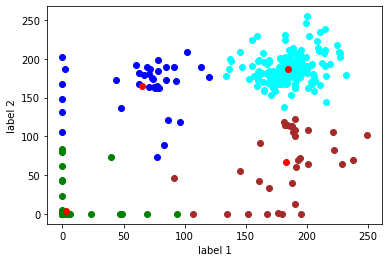

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: overflow encountered in ubyte_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: overflow encountered in ubyte_scalars


-94.98950543358598
-13.640488983992832
-2.1929207302794325
1.1181653491435952
0.6071906035141694
0.6099650816837254
0.0
     Weight  Height           1          2           3           4  Cluster
0         0       0  258.176785  23.492196  297.997102  204.715604        2
1         0       0  258.176785  23.492196  297.997102  204.715604        2
2         1       1  256.762572  22.238884  296.583093  203.557461        2
3         0       0  258.176785  23.492196  297.997102  204.715604        2
4         0      48  226.762827  26.713536  266.877189  201.913015        2
..      ...     ...         ...        ...         ...         ...      ...
387      71      72  157.061335  80.751875  196.922243  135.455485        2
388      92       0  203.843017  87.549371  240.505279  115.271746        2
389      64     103  142.743659  98.590611  182.803125  153.055107        2
390     100      36  168.260743  93.662757  205.753569  101.548469        2
391       0       0  258.176785  23.492196  

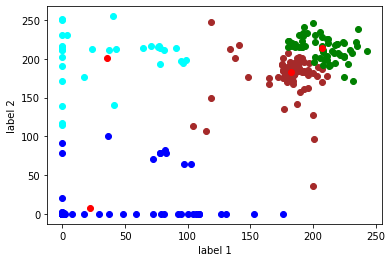

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: overflow encountered in ubyte_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: overflow encountered in ubyte_scalars


29.893429577013784
18.615869737631144
20.177947598975525
19.196376710450124
22.800875861872775
15.855902810805889
17.51855987858118
20.123953632452256
2.7763347809807883
6.384753815919072
5.4032001816813775
4.234947092796997
0.7885371023566474
3.4832033669671714
0.7800442211812819
0.26262956899510215
0.5203485500625091
0.5204473615370437
0.2670536090625184
0.0
     Weight  Height          1           2          3           4  Cluster
0         0       0  36.167268  127.555334   4.498804  138.209343        3
1         0       0  36.167268  127.555334   4.498804  138.209343        3
2         0       0  36.167268  127.555334   4.498804  138.209343        3
3         0       0  36.167268  127.555334   4.498804  138.209343        3
4         0       0  36.167268  127.555334   4.498804  138.209343        3
..      ...     ...        ...         ...        ...         ...      ...
387       0       0  36.167268  127.555334   4.498804  138.209343        3
388       0      58  42.740578   73.0

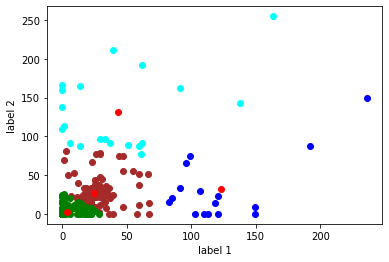

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: overflow encountered in ubyte_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: overflow encountered in ubyte_scalars


45.99661780796518
31.959412012303716
15.174127702297374
11.850937992160736
8.023807907386185
8.420125151552725
-1.66925519468127
-0.8200926676058771
-1.2021579211981788
-1.0778418282078093
-1.3738895170408512
0.0
     Weight  Height           1           2           3           4  Cluster
0         0       0  176.659749  106.212877    2.415112  218.035932        3
1         0       0  176.659749  106.212877    2.415112  218.035932        3
2         0       0  176.659749  106.212877    2.415112  218.035932        3
3         0       0  176.659749  106.212877    2.415112  218.035932        3
4        32     150  124.773682   85.378072  151.415671  106.193224        2
..      ...     ...         ...         ...         ...         ...      ...
387      39     131  111.618180   65.493016  134.616907  104.861553        2
388      93      17   97.991456   61.747026   92.503969  159.209334        2
389       0       0  176.659749  106.212877    2.415112  218.035932        3
390       0      

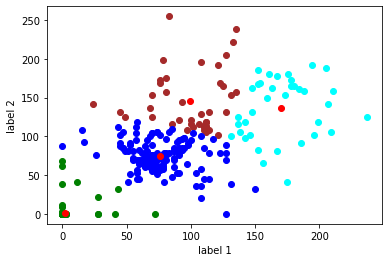

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: overflow encountered in ubyte_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: overflow encountered in ubyte_scalars


48.13063472671764
26.794679188583647
22.22830820518878
20.9874480373763
4.649242913948807
3.6658122579175476
0.0
     Weight  Height        1           2           3           4  Cluster
0         0       0  2.61336  168.585198  279.968501  226.399459        1
1         0       0  2.61336  168.585198  279.968501  226.399459        1
2         0       0  2.61336  168.585198  279.968501  226.399459        1
3         0       0  2.61336  168.585198  279.968501  226.399459        1
4         0       0  2.61336  168.585198  279.968501  226.399459        1
..      ...     ...      ...         ...         ...         ...      ...
387       0       0  2.61336  168.585198  279.968501  226.399459        1
388       0       0  2.61336  168.585198  279.968501  226.399459        1
389       0       0  2.61336  168.585198  279.968501  226.399459        1
390       0       0  2.61336  168.585198  279.968501  226.399459        1
391       0       0  2.61336  168.585198  279.968501  226.399459        1

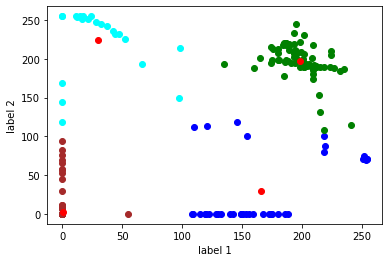

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: overflow encountered in ubyte_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: overflow encountered in ubyte_scalars


90.65960179154689
69.96072490794894
54.31768002026377
78.92953492789167
36.80564905255031
11.707438232289375
7.87001499407852
0.0
     Weight  Height           1           2           3           4  Cluster
0         0       0  204.818122  307.105482    3.044297  210.503691        3
1         0       0  204.818122  307.105482    3.044297  210.503691        3
2         0       0  204.818122  307.105482    3.044297  210.503691        3
3         0       0  204.818122  307.105482    3.044297  210.503691        3
4         0       1  203.829872  306.395068    2.845504  210.348054        3
..      ...     ...         ...         ...         ...         ...      ...
387       0       0  204.818122  307.105482    3.044297  210.503691        3
388       0     151   60.163891  226.168042  149.941551  238.896011        1
389     218      82  222.226153  136.436234  229.867739   49.793168        4
390       0       0  204.818122  307.105482    3.044297  210.503691        3
391       0       0  20

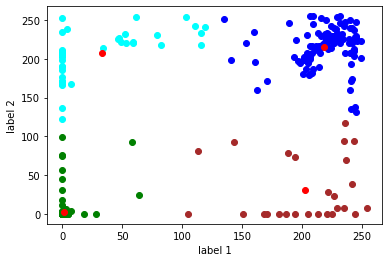

In [ ]:
class_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Boot']
plt.figure(figsize = (10,10))
for i in range(10):
  n = randint(0, X_train.shape[0]-1)
  X = X_train[n].reshape(-1,2)
  X = pd.DataFrame(X, columns=["Weight", "Height"])
  centroids = get_random_centroids(X, k = 4)
  clustered, cent = k_means_fit(X,centroids, n= 4)
  print(clustered)
  print(cent)
  plot()
  plt.show()
  
  # plt.imshow(X_train[n], cmap = plt.cm.binary) #Graficar imagenes
  # plt.xlabel(class_names[y_train[n]])

##Punto 4
En este numeral se encuentra el mismo proceso del punto anterior pero con el método de K-Means de scikit-learn usando solo la métrica de
distancia euclidiana.

Se importa la librería adicional necesaria para la realización del punto.

In [ ]:
import cv2

In [ ]:
n = randint(0, X_train.shape[0]-1)
pixel_values = X_train[n].reshape(-1,2)
print(pixel_values.shape)

(392, 2)


En el siguiente bloque de código se encuentra la implementación del kmeans con cv2

In [ ]:
pixel_values = np.float32(pixel_values)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 1000, 0.2)
k = 10 
_, labels, (centers) = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

In [ ]:
centers = np.uint8(centers)
print(centers)
print(labels.shape)
labels = labels.flatten()
print(labels.shape)
segmented_image = centers[labels]

[[ 71  18]
 [  0   0]
 [150  29]
 [ 37  98]
 [ 89  60]
 [ 57  57]
 [102 255]
 [  6  55]
 [118 176]
 [ 43  30]]
(392, 1)
(392,)


Se segmentan los componentes de la imagen y se reforman al tamaño del componente original.

(28, 28)


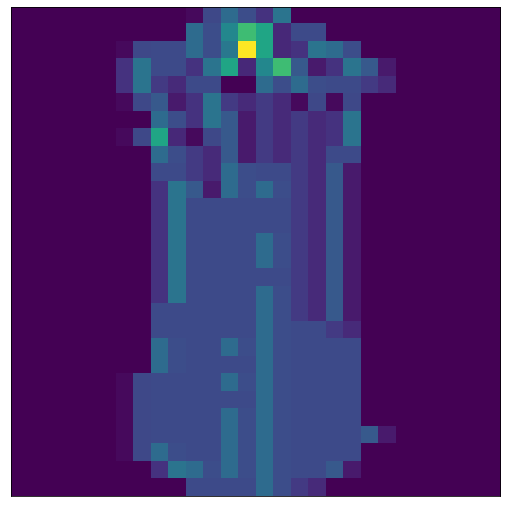

In [ ]:
segmented_image = segmented_image.reshape(X_train[n].shape)
print(segmented_image.shape)
plt.figure(figsize = (16,9))
plt.imshow(segmented_image)
plt.xticks([]);
plt.yticks([]);

Se cambian los valores de la imagen para así cambiar sus colores

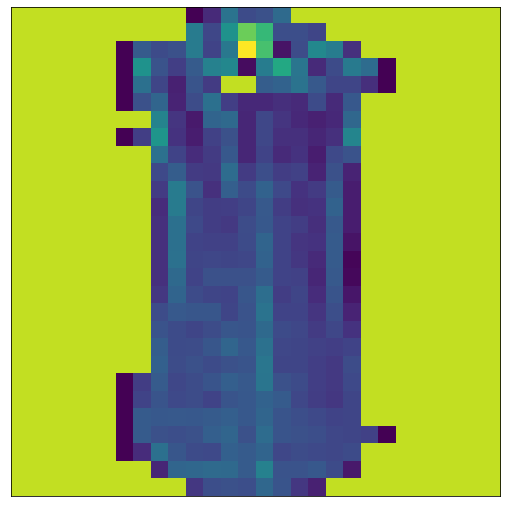

In [ ]:
#Escoger cada una de las capas y pintarlas de negro.

#Copia de la imagen para que no apunte a la misma dirección de memoria.
masked_image = np.copy(X_train[n])
masked_image = masked_image.reshape(-1,2)
cluster = 1
masked_image[labels == cluster] = [1000,1000]
masked_image = masked_image.reshape(X_train[n].shape)
plt.figure(figsize = (16,9))
plt.imshow(masked_image)
plt.xticks([]);
plt.yticks([]);